# Target and Content

This notebook is aimed to analyze a company’s ideal customers. By exploring the dataset at hand, I will use plotting and clustering to better understand these customers and finally suggest ways to improve their business by modifying products according to the specific needs, behaviors and concerns of different types of customers.

Customer personality analysis helps a business to modify its product based on its target customers from different types of customer segments. For example, instead of spending money to market a new product to every customer in the company’s database, a company can analyze which customer segment is most likely to buy the product and then market the product only on that particular segment.

link to dataset: https://www.kaggle.com/datasets/imakash3011/customer-personality-analysis

## Attributes

**People**
- ID: Customer's unique identifier
- Year_Birth: Customer's birth year
- Education: Customer's education level
- Marital_Status: Customer's marital status
- Income: Customer's yearly household income
- Kidhome: Number of children in customer's household
- Teenhome: Number of teenagers in customer's household
- Dt_Customer: Date of customer's enrollment with the company
- Recency: Number of days since customer's last purchase
- Complain: 1 if the customer complained in the last 2 years, 0 otherwise

**Products**
- MntWines: Amount spent on wine in last 2 years
- MntFruits: Amount spent on fruits in last 2 years
- MntMeatProducts: Amount spent on meat in last 2 years
- MntFishProducts: Amount spent on fish in last 2 years
- MntSweetProducts: Amount spent on sweets in last 2 years
- MntGoldProds: Amount spent on gold in last 2 years

**Promotion**
- NumDealsPurchases: Number of purchases made with a discount
- AcceptedCmp1: 1 if customer accepted the offer in the 1st campaign, 0 otherwise
- AcceptedCmp2: 1 if customer accepted the offer in the 2nd campaign, 0 otherwise
- AcceptedCmp3: 1 if customer accepted the offer in the 3rd campaign, 0 otherwise
- AcceptedCmp4: 1 if customer accepted the offer in the 4th campaign, 0 otherwise
- AcceptedCmp5: 1 if customer accepted the offer in the 5th campaign, 0 otherwise
- Response: 1 if customer accepted the offer in the last campaign, 0 otherwise

**Place**
- NumWebPurchases: Number of purchases made through the company’s website
- NumCatalogPurchases: Number of purchases made using a catalogue
- NumStorePurchases: Number of purchases made directly in stores
- NumWebVisitsMonth: Number of visits to company’s website in the last month

## Import libraries and load dataset

In [46]:
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
from matplotlib import rcParams
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import quantile_transform
from sklearn.preprocessing import minmax_scale
from sklearn.preprocessing import OneHotEncoder  ##. better to use dummy from pandas 
from sklearn.preprocessing import PowerTransformer
from scipy.stats import boxcox
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
from scipy.stats import boxcox
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import mean_absolute_error as mae
pd.options.display.max_rows = 50

In [47]:
df = pd.read_csv("/Users/costanzabrusutti/Documents/GitHub/Unit 9/marketing_campaign.csv", delimiter="\t")
df.shape 

(2240, 29)

Return a tuple representing the dimensionality of the DataFrame.
The data set contains 2240 observations and 29 variables.

In [48]:
df

ID  Year_Birth   Education Marital_Status   Income  Kidhome  \
0      5524        1957  Graduation         Single  58138.0        0   
1      2174        1954  Graduation         Single  46344.0        1   
2      4141        1965  Graduation       Together  71613.0        0   
3      6182        1984  Graduation       Together  26646.0        1   
4      5324        1981         PhD        Married  58293.0        1   
...     ...         ...         ...            ...      ...      ...   
2235  10870        1967  Graduation        Married  61223.0        0   
2236   4001        1946         PhD       Together  64014.0        2   
2237   7270        1981  Graduation       Divorced  56981.0        0   
2238   8235        1956      Master       Together  69245.0        0   
2239   9405        1954         PhD        Married  52869.0        1   

      Teenhome Dt_Customer  Recency  MntWines  ...  NumWebVisitsMonth  \
0            0  04-09-2012       58       635  ...                  7   
1            1  08-03-2014       38        11  ...                  5   
2            0  21-08-2013       26       426  ...                  4   
3            0  10-02-2014       26        11  ...                  6   
4            0  19-01-2014       94       173  ...                  5   
...        ...         ...      ...       ...  ...                ...   
2235         1  13-06-2013       46       709  ...                  5   
2236         1  10-06-2014       56       406  ...                  7   
2237         0  25-01-2014       91       908  ...                  6   
2238         1  24-01-2014        8       428  ...                  3   
2239         1  15-10-2012       40        84  ...                  7   

      AcceptedCmp3  AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  \
0                0             0             0             0             0   
1                0             0             0             0             0   
2                0             0             0             0             0   
3                0             0             0             0             0   
4                0             0             0             0             0   
...            ...           ...           ...           ...           ...   
2235             0             0             0             0             0   
2236             0             0             0             1             0   
2237             0             1             0             0             0   
2238             0             0             0             0             0   
2239             0             0             0             0             0   

      Complain  Z_CostContact  Z_Revenue  Response  
0            0              3         11         1  
1            0              3         11         0  
2            0              3         11         0  
3            0              3         11         0  
4            0              3         11         0  
...        ...            ...        ...       ...  
2235         0              3         11         0  
2236         0              3         11         0  
2237         0              3         11         0  
2238         0              3         11         0  
2239         0              3         11         1  

[2240 rows x 29 columns]

In [49]:
list(df.columns)

['ID',
 'Year_Birth',
 'Education',
 'Marital_Status',
 'Income',
 'Kidhome',
 'Teenhome',
 'Dt_Customer',
 'Recency',
 'MntWines',
 'MntFruits',
 'MntMeatProducts',
 'MntFishProducts',
 'MntSweetProducts',
 'MntGoldProds',
 'NumDealsPurchases',
 'NumWebPurchases',
 'NumCatalogPurchases',
 'NumStorePurchases',
 'NumWebVisitsMonth',
 'AcceptedCmp3',
 'AcceptedCmp4',
 'AcceptedCmp5',
 'AcceptedCmp1',
 'AcceptedCmp2',
 'Complain',
 'Z_CostContact',
 'Z_Revenue',
 'Response']

# Data Cleaning and Feature Engineering

Check data types and consistency, Nan and duplicates, add and drop features and unnecessary columns

In [50]:
#df.dtypes #the data type of each column
df.info() #obtain information about every column in the dataframe

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

Observations:
1. Data contains 2240 rows and 29 columns
2. It has 1 float, 3 object and 25 int columns
3. Datetime columns have int datatype and must be fixed
4. Many categorical columns are alredy in int format, like AcceptedCmp1, Response
5. There are 24 missing values in Income column
6. There are no duplicate values within data

In [51]:
df.describe() 
#gives us a dataframe with a statistical summary of every column
#how does the data look like mathematically?

ID   Year_Birth         Income      Kidhome     Teenhome  \
count   2240.000000  2240.000000    2216.000000  2240.000000  2240.000000   
mean    5592.159821  1968.805804   52247.251354     0.444196     0.506250   
std     3246.662198    11.984069   25173.076661     0.538398     0.544538   
min        0.000000  1893.000000    1730.000000     0.000000     0.000000   
25%     2828.250000  1959.000000   35303.000000     0.000000     0.000000   
50%     5458.500000  1970.000000   51381.500000     0.000000     0.000000   
75%     8427.750000  1977.000000   68522.000000     1.000000     1.000000   
max    11191.000000  1996.000000  666666.000000     2.000000     2.000000   

           Recency     MntWines    MntFruits  MntMeatProducts  \
count  2240.000000  2240.000000  2240.000000      2240.000000   
mean     49.109375   303.935714    26.302232       166.950000   
std      28.962453   336.597393    39.773434       225.715373   
min       0.000000     0.000000     0.000000         0.000000   
25%      24.000000    23.750000     1.000000        16.000000   
50%      49.000000   173.500000     8.000000        67.000000   
75%      74.000000   504.250000    33.000000       232.000000   
max      99.000000  1493.000000   199.000000      1725.000000   

       MntFishProducts  ...  NumWebVisitsMonth  AcceptedCmp3  AcceptedCmp4  \
count      2240.000000  ...        2240.000000   2240.000000   2240.000000   
mean         37.525446  ...           5.316518      0.072768      0.074554   
std          54.628979  ...           2.426645      0.259813      0.262728   
min           0.000000  ...           0.000000      0.000000      0.000000   
25%           3.000000  ...           3.000000      0.000000      0.000000   
50%          12.000000  ...           6.000000      0.000000      0.000000   
75%          50.000000  ...           7.000000      0.000000      0.000000   
max         259.000000  ...          20.000000      1.000000      1.000000   

       AcceptedCmp5  AcceptedCmp1  AcceptedCmp2     Complain  Z_CostContact  \
count   2240.000000   2240.000000   2240.000000  2240.000000         2240.0   
mean       0.072768      0.064286      0.013393     0.009375            3.0   
std        0.259813      0.245316      0.114976     0.096391            0.0   
min        0.000000      0.000000      0.000000     0.000000            3.0   
25%        0.000000      0.000000      0.000000     0.000000            3.0   
50%        0.000000      0.000000      0.000000     0.000000            3.0   
75%        0.000000      0.000000      0.000000     0.000000            3.0   
max        1.000000      1.000000      1.000000     1.000000            3.0   

       Z_Revenue     Response  
count     2240.0  2240.000000  
mean        11.0     0.149107  
std          0.0     0.356274  
min         11.0     0.000000  
25%         11.0     0.000000  
50%         11.0     0.000000  
75%         11.0     0.000000  
max         11.0     1.000000  

[8 rows x 26 columns]

## Correcting column names

In [52]:
df.rename(columns = {'MntWines':'Wine', 
                     'MntFruits':'Fruit', 
                     'MntMeatProducts':'Meat',
                     'MntFishProducts':'Fish',
                     'MntSweetProducts':'Sweet',
                     'MntGoldProds':'Gold',
                     'NumDealsPurchases':'Discount',
                     'NumWebPurchases':'Web',
                     'NumCatalogPurchases':'Catalog',
                     'NumStorePurchases':'Store',
                     'NumWebVisitsMonth':'WebVisits'
                    }, inplace = True)


## Converting datetime column into correct format

In [53]:
#changing datatype for date column
df["Dt_Customer"]=pd.to_datetime(df["Dt_Customer"]) 

#check last date and calculate years of customer registration 

In [54]:
df.Dt_Customer

0      2012-04-09
1      2014-08-03
2      2013-08-21
3      2014-10-02
4      2014-01-19
          ...    
2235   2013-06-13
2236   2014-10-06
2237   2014-01-25
2238   2014-01-24
2239   2012-10-15
Name: Dt_Customer, Length: 2240, dtype: datetime64[ns]

In [55]:
#check the most recent date of that column
recent = df["Dt_Customer"].max()
recent

Timestamp('2014-12-06 00:00:00')

In [56]:
#check the oldest date of that column
old = df["Dt_Customer"].min()
old 

Timestamp('2012-01-08 00:00:00')

In [57]:
recent = pd.to_datetime(recent)
old  = pd.to_datetime(old)

In [58]:
#calculating days of being a customer to use it as a variable 
#dt.days means that I only want to keep the days out in the timestamp
df["Customership"] = (df["Dt_Customer"] - old).dt.days
df["Customership"]

0         92
1        938
2        591
3        998
4        742
        ... 
2235     522
2236    1002
2237     748
2238     747
2239     281
Name: Customership, Length: 2240, dtype: int64

In [59]:
# now we have the amount of days that each person became a customer
df

ID  Year_Birth   Education Marital_Status   Income  Kidhome  \
0      5524        1957  Graduation         Single  58138.0        0   
1      2174        1954  Graduation         Single  46344.0        1   
2      4141        1965  Graduation       Together  71613.0        0   
3      6182        1984  Graduation       Together  26646.0        1   
4      5324        1981         PhD        Married  58293.0        1   
...     ...         ...         ...            ...      ...      ...   
2235  10870        1967  Graduation        Married  61223.0        0   
2236   4001        1946         PhD       Together  64014.0        2   
2237   7270        1981  Graduation       Divorced  56981.0        0   
2238   8235        1956      Master       Together  69245.0        0   
2239   9405        1954         PhD        Married  52869.0        1   

      Teenhome Dt_Customer  Recency  Wine  ...  AcceptedCmp3  AcceptedCmp4  \
0            0  2012-04-09       58   635  ...             0             0   
1            1  2014-08-03       38    11  ...             0             0   
2            0  2013-08-21       26   426  ...             0             0   
3            0  2014-10-02       26    11  ...             0             0   
4            0  2014-01-19       94   173  ...             0             0   
...        ...         ...      ...   ...  ...           ...           ...   
2235         1  2013-06-13       46   709  ...             0             0   
2236         1  2014-10-06       56   406  ...             0             0   
2237         0  2014-01-25       91   908  ...             0             1   
2238         1  2014-01-24        8   428  ...             0             0   
2239         1  2012-10-15       40    84  ...             0             0   

      AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  Complain  Z_CostContact  \
0                0             0             0         0              3   
1                0             0             0         0              3   
2                0             0             0         0              3   
3                0             0             0         0              3   
4                0             0             0         0              3   
...            ...           ...           ...       ...            ...   
2235             0             0             0         0              3   
2236             0             1             0         0              3   
2237             0             0             0         0              3   
2238             0             0             0         0              3   
2239             0             0             0         0              3   

      Z_Revenue  Response  Customership  
0            11         1            92  
1            11         0           938  
2            11         0           591  
3            11         0           998  
4            11         0           742  
...         ...       ...           ...  
2235         11         0           522  
2236         11         0          1002  
2237         11         0           748  
2238         11         0           747  
2239         11         1           281  

[2240 rows x 30 columns]

## Nan, dropping & filling with mean value, adjusting features

In [60]:
#returns the number of missing values in the data set
df.isnull().sum()

ID                 0
Year_Birth         0
Education          0
Marital_Status     0
Income            24
Kidhome            0
Teenhome           0
Dt_Customer        0
Recency            0
Wine               0
Fruit              0
Meat               0
Fish               0
Sweet              0
Gold               0
Discount           0
Web                0
Catalog            0
Store              0
WebVisits          0
AcceptedCmp3       0
AcceptedCmp4       0
AcceptedCmp5       0
AcceptedCmp1       0
AcceptedCmp2       0
Complain           0
Z_CostContact      0
Z_Revenue          0
Response           0
Customership       0
dtype: int64

In [61]:
df['Income'].skew()

6.763487372811116

If the skewness is less than -1 or greater than 1, the data are highly skewed, meaning that there are outliers in the data. \
We will then replace the data with the mean.

In [62]:
#fill nan with mean value.
df["Income"]= df["Income"].fillna(df["Income"].mean())

In [63]:
#same as isnull
df.isna().sum()

ID                0
Year_Birth        0
Education         0
Marital_Status    0
Income            0
Kidhome           0
Teenhome          0
Dt_Customer       0
Recency           0
Wine              0
Fruit             0
Meat              0
Fish              0
Sweet             0
Gold              0
Discount          0
Web               0
Catalog           0
Store             0
WebVisits         0
AcceptedCmp3      0
AcceptedCmp4      0
AcceptedCmp5      0
AcceptedCmp1      0
AcceptedCmp2      0
Complain          0
Z_CostContact     0
Z_Revenue         0
Response          0
Customership      0
dtype: int64

In [64]:
#check if there are no more null in a specific column
pd.notna('Income')

True

In [65]:
#drop duplicate rows
df=df.drop_duplicates(keep=False, inplace=False)

### Adjust Features 

In [66]:
#look into a column's unique values
df["Marital_Status"].value_counts()

Married     864
Together    580
Single      480
Divorced    232
Widow        77
Alone         3
Absurd        2
YOLO          2
Name: Marital_Status, dtype: int64

In [67]:
df["MaritalStatus"]=df["Marital_Status"].replace({"Married":"In Relationship", "Together":"In Relationship",
                                                   "Absurd":"Single", "Widow":"Single", "YOLO":"Single", "Divorced":"Single","Alone":"Single"})

df["MaritalStatus"].value_counts()

In Relationship    1444
Single              796
Name: MaritalStatus, dtype: int64

In [68]:
#Calculate total spending amount on products for each customer 
df["TotalSpent"]=df['Meat']+df['Fish']+df['Sweet']+df['Gold']+df['Fruit']+df['Wine']


In [69]:
# Total number of accepted campaigns
df['Total_Acc_Cmp'] = df['AcceptedCmp1'] + df['AcceptedCmp2'] + df['AcceptedCmp3'] + df['AcceptedCmp4'] + df['AcceptedCmp5'] + df['Response']


In [70]:
#Segmenting education levels in three groups
df["Education"]=df["Education"].replace({"Basic":"Undergraduate","2n Cycle":"Undergraduate", "Graduation":"Graduate", "Master":"Postgraduate", "PhD":"Postgraduate"})

df["Education"].unique()

array(['Graduate', 'Postgraduate', 'Undergraduate'], dtype=object)

In [71]:
#adding column for having children or not in general,either they are kids or teens
df["TotalChildren"]=df['Kidhome']+df['Teenhome']

df["Children"] = df["TotalChildren"].apply(lambda x: 0 if x == 0 else 1)


In [72]:
df["Children"]

0       0
1       1
2       0
3       1
4       1
       ..
2235    1
2236    1
2237    0
2238    1
2239    1
Name: Children, Length: 2240, dtype: int64

In [73]:
#calculating age because it is more useful than year of birth 
df["Age"]=2014-df['Year_Birth'] 

In [74]:
df["Age"]

0       57
1       60
2       49
3       30
4       33
        ..
2235    47
2236    68
2237    33
2238    58
2239    60
Name: Age, Length: 2240, dtype: int64

In [75]:
# Total number of purchases made
df['TotalPurchases'] = df['Web'] + df['Catalog'] + df['Store'] + df['Discount']


In [76]:
df['Response'].value_counts()

0    1906
1     334
Name: Response, dtype: int64

In [77]:
#drop columns that are not useful
df=df.drop(['ID', 'Complain', 'AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'Response', 'Year_Birth', 'Marital_Status', 'Kidhome', 'Teenhome', 'Dt_Customer', 'Z_CostContact', 'Z_Revenue', 'TotalChildren'],axis=1)






In [78]:
df

Education   Income  Recency  Wine  Fruit  Meat  Fish  Sweet  Gold  \
0         Graduate  58138.0       58   635     88   546   172     88    88   
1         Graduate  46344.0       38    11      1     6     2      1     6   
2         Graduate  71613.0       26   426     49   127   111     21    42   
3         Graduate  26646.0       26    11      4    20    10      3     5   
4     Postgraduate  58293.0       94   173     43   118    46     27    15   
...            ...      ...      ...   ...    ...   ...   ...    ...   ...   
2235      Graduate  61223.0       46   709     43   182    42    118   247   
2236  Postgraduate  64014.0       56   406      0    30     0      0     8   
2237      Graduate  56981.0       91   908     48   217    32     12    24   
2238  Postgraduate  69245.0        8   428     30   214    80     30    61   
2239  Postgraduate  52869.0       40    84      3    61     2      1    21   

      Discount  ...  Catalog  Store  WebVisits  Customership    MaritalStatus  \
0            3  ...       10      4          7            92           Single   
1            2  ...        1      2          5           938           Single   
2            1  ...        2     10          4           591  In Relationship   
3            2  ...        0      4          6           998  In Relationship   
4            5  ...        3      6          5           742  In Relationship   
...        ...  ...      ...    ...        ...           ...              ...   
2235         2  ...        3      4          5           522  In Relationship   
2236         7  ...        2      5          7          1002  In Relationship   
2237         1  ...        3     13          6           748           Single   
2238         2  ...        5     10          3           747  In Relationship   
2239         3  ...        1      4          7           281  In Relationship   

     TotalSpent  Total_Acc_Cmp  Children  Age  TotalPurchases  
0          1617              1         0   57              25  
1            27              0         1   60               6  
2           776              0         0   49              21  
3            53              0         1   30               8  
4           422              0         1   33              19  
...         ...            ...       ...  ...             ...  
2235       1341              0         1   47              18  
2236        444              1         1   68              22  
2237       1241              1         0   33              19  
2238        843              0         1   58              23  
2239        172              1         1   60              11  

[2240 rows x 21 columns]

In [79]:
df1 = df.copy() # make a copy to add clusters to this data
df1.drop(['Education','MaritalStatus',], axis=1, inplace=True)

df1

Income  Recency  Wine  Fruit  Meat  Fish  Sweet  Gold  Discount  Web  \
0     58138.0       58   635     88   546   172     88    88         3    8   
1     46344.0       38    11      1     6     2      1     6         2    1   
2     71613.0       26   426     49   127   111     21    42         1    8   
3     26646.0       26    11      4    20    10      3     5         2    2   
4     58293.0       94   173     43   118    46     27    15         5    5   
...       ...      ...   ...    ...   ...   ...    ...   ...       ...  ...   
2235  61223.0       46   709     43   182    42    118   247         2    9   
2236  64014.0       56   406      0    30     0      0     8         7    8   
2237  56981.0       91   908     48   217    32     12    24         1    2   
2238  69245.0        8   428     30   214    80     30    61         2    6   
2239  52869.0       40    84      3    61     2      1    21         3    3   

      Catalog  Store  WebVisits  Customership  TotalSpent  Total_Acc_Cmp  \
0          10      4          7            92        1617              1   
1           1      2          5           938          27              0   
2           2     10          4           591         776              0   
3           0      4          6           998          53              0   
4           3      6          5           742         422              0   
...       ...    ...        ...           ...         ...            ...   
2235        3      4          5           522        1341              0   
2236        2      5          7          1002         444              1   
2237        3     13          6           748        1241              1   
2238        5     10          3           747         843              0   
2239        1      4          7           281         172              1   

      Children  Age  TotalPurchases  
0            0   57              25  
1            1   60               6  
2            0   49              21  
3            1   30               8  
4            1   33              19  
...        ...  ...             ...  
2235         1   47              18  
2236         1   68              22  
2237         0   33              19  
2238         1   58              23  
2239         1   60              11  

[2240 rows x 19 columns]

In [80]:
df1['Income'].value_counts(max)

52247.251354    0.010714
7500.000000     0.005357
35860.000000    0.001786
37760.000000    0.001339
83844.000000    0.001339
                  ...   
40760.000000    0.000446
41452.000000    0.000446
6835.000000     0.000446
33622.000000    0.000446
52869.000000    0.000446
Name: Income, Length: 1975, dtype: float64

### Outliers removal through Capping

In [81]:
#drop outliers for age and income 
num_col = df1.select_dtypes(include = np.number).columns

In [82]:
for col in num_col:
    q1 = df1[col].quantile(0.25)
    q3 = df1[col].quantile(0.75)
    iqr = q3-q1
    ll = q1-(1.5*iqr)
    ul = q3+(1.5*iqr)
    for ind in df1[col].index:
        if df1.loc[ind,col]>ul:
            df1.loc[ind,col]=ul
        elif df1.loc[ind,col]<ll:
            df1.loc[ind,col]=ll
        else:
            pass
print("Outliers have been taken care of")

Outliers have been taken care of


In [83]:
df1['Income'].value_counts(max)

52247.251354     0.010714
7500.000000      0.005357
117416.250000    0.003571
35860.000000     0.001786
67445.000000     0.001339
                   ...   
74250.000000     0.000446
40760.000000     0.000446
41452.000000     0.000446
6835.000000      0.000446
52869.000000     0.000446
Name: Income, Length: 1968, dtype: float64

## Feature Transformation

### Ordinal Encoding

Encoding ordinal column and then nominal columns

In [84]:
from numpy import asarray
from sklearn.preprocessing import OrdinalEncoder

oe = OrdinalEncoder(categories=[['Undergraduate','Graduate','Postgraduate']])
df_education = pd.DataFrame(oe.fit_transform(df[['Education']]), columns=['Education'])


In [85]:
df_dummies=pd.get_dummies(df[['MaritalStatus']],drop_first=True)

### Concat the encoded columns with our data

In [86]:
df2 = pd.concat([df1,df_education,df_dummies], axis=1)

In [87]:
df2.sample(5)

Income  Recency  Wine  Fruit  Meat  Fish  Sweet  Gold  Discount  Web  \
2183  26487.0       23     2      8    10  12.0     14  23.0         3    2   
272   61905.0        2   167      0    43   6.0      2  13.0         2    4   
645   46463.0       56   163      2    40   8.0     11  11.0         6    3   
599   31089.0       57    31      3    31   2.0      8   4.0         3    3   
308   64100.0       93   509      0    27   0.0      0  10.0         1    8   

      ...  Store  WebVisits  Customership  TotalSpent  Total_Acc_Cmp  \
2183  ...      3          5           498        69.0            0.0   
272   ...      4          5           815       231.0            0.0   
645   ...      6          6           588       235.0            0.0   
599   ...      4          8           222        79.0            0.0   
308   ...      6          7           640       546.0            1.0   

      Children  Age  TotalPurchases  Education  MaritalStatus_Single  
2183         1   36             9.0        0.0                     1  
272          1   39            12.0        2.0                     0  
645          1   43            17.0        2.0                     0  
599          1   33            10.0        1.0                     0  
308          1   50            18.0        2.0                     0  

[5 rows x 21 columns]

### Standardize the data
TotalSpent is my "target" \
I want to standardize my data because for example wine can on average be more expensive. \
Let's scale all the numeric columns

In [88]:
num_cols = ['Income', 'Recency', 'Wine', 'Fruit',
       'Meat', 'Fish', 'Sweet', 'Gold', 'Discount', 'Web',
       'Catalog', 'Store', 'WebVisits','Age', 'Customership',
       'TotalSpent', 'TotalPurchases', 'Total_Acc_Cmp', 'Children',
       'Education']
scaler = StandardScaler()
scaled_df = df2.copy()
scaled_df[num_cols] = scaler.fit_transform(scaled_df[num_cols])
print('The data has been scaled successfully!')


The data has been scaled successfully!


In [89]:
scaled_df.sample(5)

Income   Recency      Wine     Fruit      Meat      Fish     Sweet  \
1016  0.910061 -0.280059  1.005751  2.176816  0.576847  2.190303  2.145044   
637   0.205712 -1.488790 -0.547196  2.176816 -0.457963 -0.597630  0.801260   
1581  1.252560  0.134363  0.199064  0.378734  2.266105 -0.473722  0.764942   
1323 -0.673684 -0.729016 -0.390089 -0.501959 -0.245408 -0.622412 -0.724116   
604  -0.107836  0.963208 -0.671070 -0.685437 -0.698487 -0.696756 -0.724116   

          Gold  Discount       Web  ...     Store  WebVisits  Customership  \
1016  0.914668 -0.790225  0.732707  ...  0.372226  -0.979246      1.537800   
637   0.213241 -0.790225 -0.022939  ...  0.372226  -0.553322      0.086327   
1581 -0.738696 -0.790225 -0.022939  ... -0.243114  -1.831096      0.529952   
1323  2.179743  1.159945  1.110530  ... -0.858455   1.576301     -2.110263   
604  -0.638493  1.159945 -0.400762  ... -0.858455   0.724452     -0.719089   

      TotalSpent  Total_Acc_Cmp  Children       Age  TotalPurchases  \
1016    1.257726       0.824465 -1.584605  0.327318        0.670577   
637    -0.353422      -0.550155  0.631072  0.582222       -0.112103   
1581    0.829194      -0.550155 -1.584605  1.856747        0.279237   
1323   -0.220544       2.199084  0.631072 -0.692302        0.148791   
604    -0.791920      -0.550155  0.631072  0.242349       -0.503443   

      Education  MaritalStatus_Single  
1016  -1.943282                     0  
637   -0.410013                     0  
1581   1.123256                     0  
1323  -0.410013                     1  
604    1.123256                     0  

[5 rows x 21 columns]

## EDA and Plotting

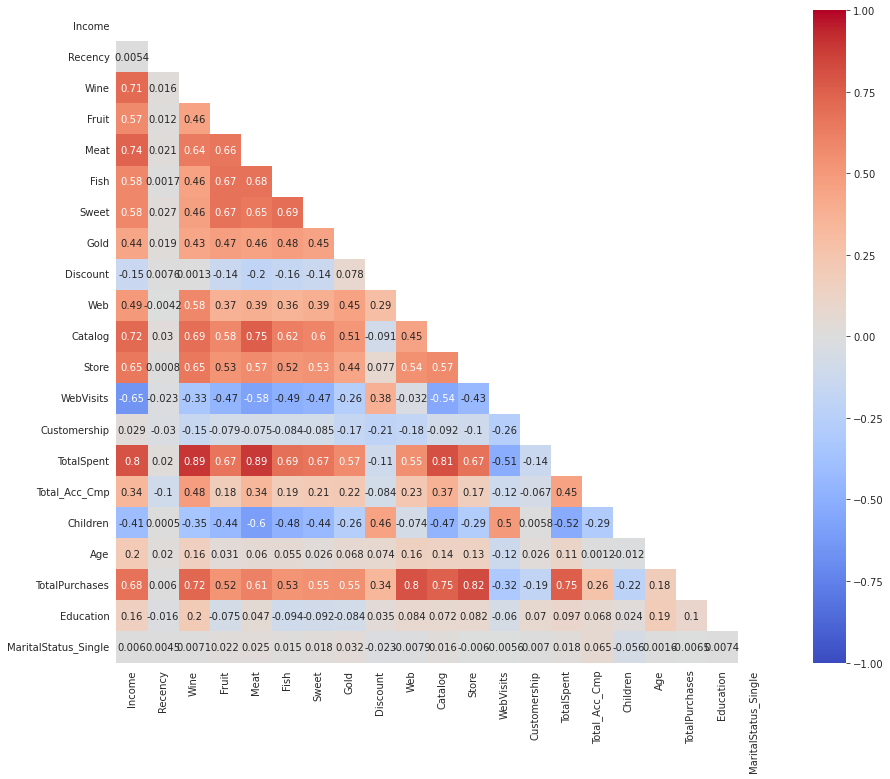

In [90]:
corr = scaled_df.corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    f, ax = plt.subplots(figsize=(16, 12))
    ax = sns.heatmap(corr, mask=mask,cmap='coolwarm', vmin=-1,vmax=1,annot=True, square=True)

Because they have significant role in spending I will check age and income columns 

<Figure size 432x288 with 0 Axes>

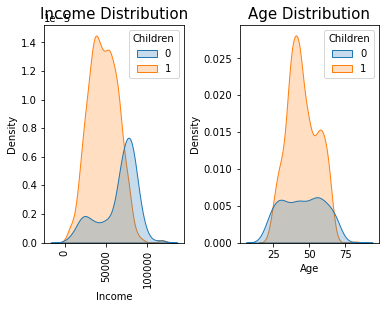

In [91]:
plt.subplots_adjust(wspace=0.4)
fig, axes = plt.subplots(1,2)
plt.subplots_adjust(wspace=0.4)
sns.kdeplot(df2["Income"],hue=df2["Children"],shade=True,ax=axes[0])
sns.kdeplot(data=df2,x="Age",hue="Children",shade=True,ax=axes[1])
axes[0].set_title('Income Distribution',fontsize=15)
axes[0].tick_params(axis='x', rotation=90)

axes[1].set_title('Age Distribution',fontsize=15)
fig.show()

- Most of our customers are 35+ 
- People with  children have higher income

### Education and Spending

<Figure size 432x288 with 0 Axes>

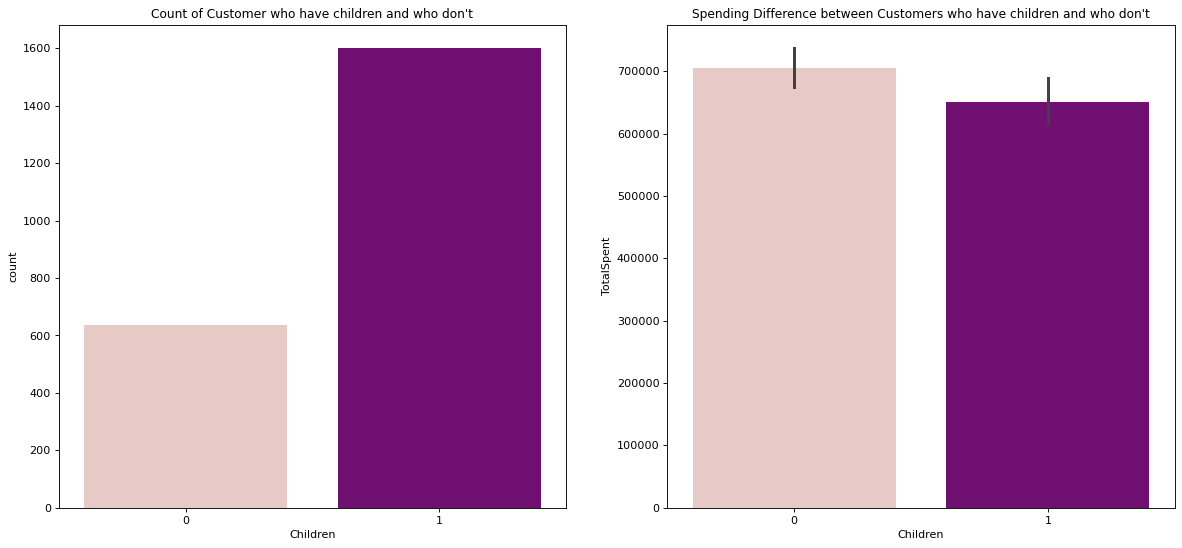

In [92]:
plt.subplots_adjust(wspace=5)
fig, axes = plt.subplots(figsize=(18, 8), dpi=80, ncols=2)
sns.countplot(df2["Children"],ax=axes[0],palette=["#ECC5C0", "#800080"])
sns.barplot(df2["Children"],df2["TotalSpent"],estimator=sum,ax=axes[1],palette=["#ECC5C0", "#800080"])
axes[0].set_title("Count of Customer who have children and who don't",fontsize=11)
axes[1].set_title("Spending Difference between Customers who have children and who don't",fontsize=11)
fig.show()

The number of customers with at least one children is higher. \
But: most of our income comes from customers who have 0 children.

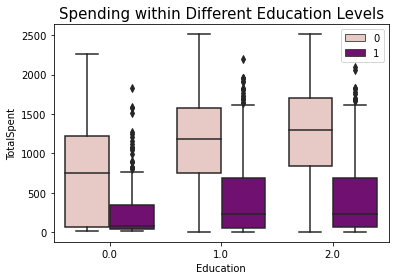

In [93]:
sns.boxplot(df2["Education"],df2["TotalSpent"],hue=df2["Children"],palette=["#ECC5C0", "#800080"])
plt.legend(loc='upper right')
plt.title("Spending within Different Education Levels",fontsize=15)
fig.show()

- The average spending and the highest spending value are higher for customers  with PHD or master degree and don't have children.And in general spending  customers who don't have children have higher spending 

### Spending among different categories

In [94]:
plot_df = pd.DataFrame(df2[['Wine', 'Fruit','Meat', 'Fish', 'Sweet', 'Gold']].sum()).reset_index()
plot_df.columns=["category","Spent_per_category"]


In [95]:
import plotly.express as px

fig = px.pie(plot_df, values='Spent_per_category', names='category',color_discrete_sequence=px.colors.sequential.Purp)
fig.update_layout(
    autosize=False,
    width=600,
    height=300,
    
    
    template="simple_white",
    font_family='Courier New',
    paper_bgcolor="#FCFAFB",
    title_text = 'Sales by Category',title_x=0.5,

    showlegend=True)



fig.show()

Wine has the highest percentage of sales (almost half), followed by meat products, and then the percentages of sales for the rest of the products are almost the same .

### Ways of Purchases

In [96]:
plot2=df2[[ 'Web','Catalog', 'Store' ]].sum().reset_index()
plot2.columns=["purchases_way","pur_num"]
plot2['purchases_way'] = plot2['purchases_way'].map(lambda x: x.lstrip('Num'))


In [97]:
fig = px.pie(plot2, values='pur_num', names='purchases_way',color_discrete_sequence=px.colors.sequential.Magenta)
fig.update_layout(
    autosize=False,
    width=600,
    height=300,
    
    template="simple_white",
    font_family='Courier New',
    paper_bgcolor="#FCFAFB",
    title_text = 'Ways of Purchases ',title_x=0.5,

    showlegend=True)



fig.show()

Most of our sales come from our store, so we need to exploitation our web app better .


### Campaign Acceptance 

In [98]:
campaign=df[['Total_Acc_Cmp']]
campaign=campaign.replace({1:"Accept",0:"Didn't accept "})


# Clustering

Dividing the data points into a number of groups such that data points in the same groups are more similar to other data points in the same group and dissimilar to the data points in other groups.  \
Collecting objects on the basis of similarity and dissimilarity between them.

In [99]:
import pickle
from sklearn import datasets # sklearn comes with some toy datasets to practise
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

## K-means
It divides a set of samples into clusters, each described by the mean of the samples in the cluster (centroids).  \
The K-means algorithm aims to choose centroids that minimise the inertia.

K-Means is a distance based algorithm: we will use the scaled data. \
Before applying the K-Means algorithm we need to decide how many clusters we would like to have using Elbow Method and Silhouette Score for validation

### Find best K: Elbow Method

In [100]:
K = range(2, 21)
inertia = []

for k in K:
    #print("Training a K-Means model with {} clusters! ".format(k))
    kmeans = KMeans(n_clusters=k,
                    random_state=1234)
    kmeans.fit(scaled_df)
    inertia.append(kmeans.inertia_)


Text(0.5, 1.0, 'Elbow Method showing the optimal k')

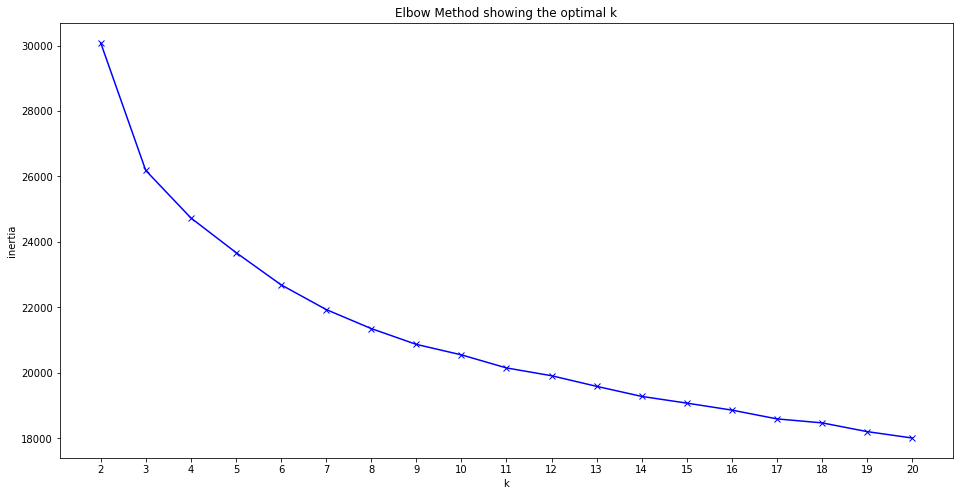

In [101]:
plt.figure(figsize=(16,8))
plt.plot(K, inertia, 'bx-')
plt.xlabel('k')
plt.ylabel('inertia')
plt.xticks(np.arange(min(K), max(K)+1, 1.0))
plt.title('Elbow Method showing the optimal k')

### Find best K: Silhouette Method

Text(0.5, 1.0, 'Silhouette Method showing the optimal k')

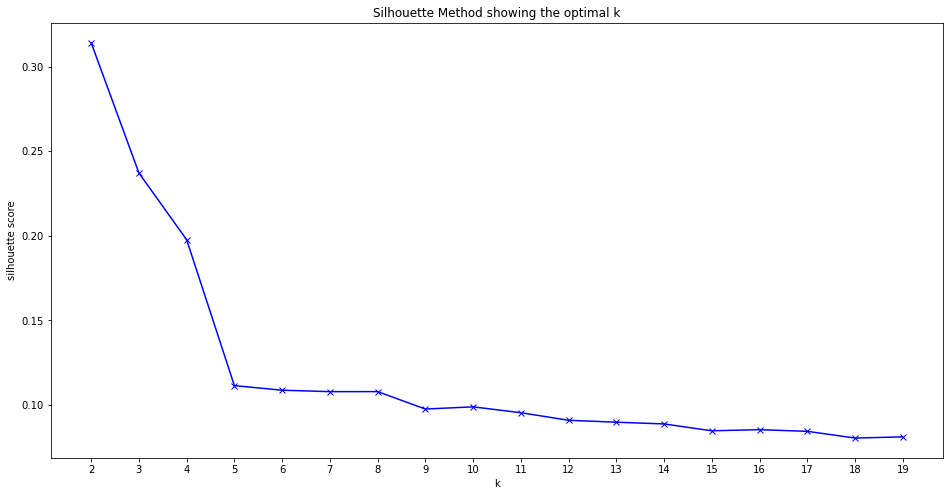

In [102]:
K = range(2, 20)
silhouette = []

for k in K:
    kmeans = KMeans(n_clusters=k,
                    random_state=1234)
    kmeans.fit(scaled_df)
    silhouette.append(silhouette_score(scaled_df, kmeans.predict(scaled_df)))


plt.figure(figsize=(16,8))
plt.plot(K, silhouette, 'bx-')
plt.xlabel('k')
plt.ylabel('silhouette score')
plt.xticks(np.arange(min(K), max(K)+1, 1.0))
plt.title('Silhouette Method showing the optimal k')

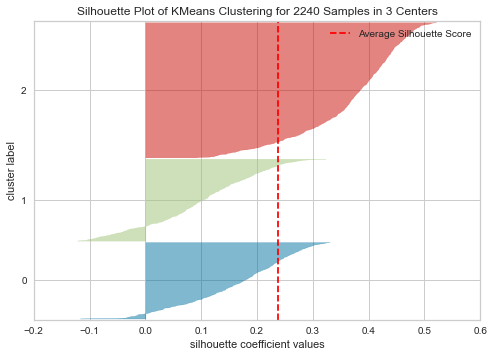

<AxesSubplot:title={'center':'Silhouette Plot of KMeans Clustering for 2240 Samples in 3 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [103]:
from yellowbrick.cluster import SilhouetteVisualizer

model = KMeans(3, random_state=42)
visualizer = SilhouetteVisualizer(model, colors='yellowbrick')
visualizer.fit(scaled_df)        # Fit the data to the visualizer
visualizer.show()

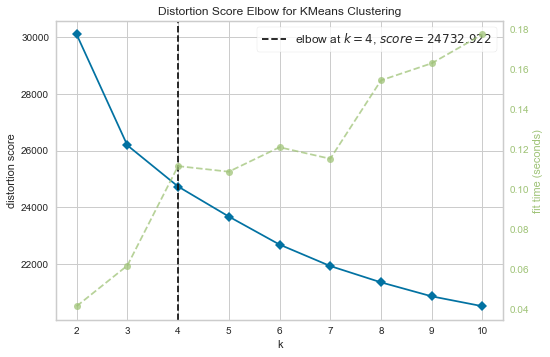

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [104]:
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans


elbow_graph = KElbowVisualizer(KMeans(random_state=43), k=10)
elbow_graph.fit(scaled_df)
elbow_graph.show()

1. We are getting bad silhouette score, it should be near to +1
2. The higher the number of features in the clustering problem, the more difficult it will be to work with, processing high-dimensional data will bring high processing power and cost.

### K MEANS

Unsupervised learning, also known as unsupervised machine learning, uses machine learning algorithms to analyze and cluster unlabeled datasets. These algorithms discover hidden patterns or data groupings without the need for human intervention. Its ability to discover similarities and differences in information make it the ideal solution for exploratory data analysis, cross-selling strategies, customer segmentation, and image recognition.

In [105]:
kmeans = KMeans(n_clusters=4, random_state=42)
scaled_df['Clusters'] = kmeans.fit_predict(scaled_df)
df2['Clusters'] = kmeans.fit_predict(scaled_df)


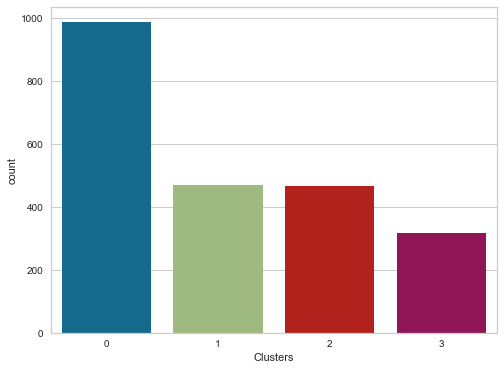

In [106]:
# count plot to see number of customers in each cluster
plt.figure(figsize=(8, 6 ))
sns.countplot(x='Clusters', data=scaled_df)
plt.show()

Cluster 3 has least amount of customers. \
Cluster 0 has largest number of customers. \
Cluster 1 and 2 has same amount of customers.

Now we'll try to find out what type of customers each cluster has. How many childrens customers within each cluster has, whats thir educational background, what is the age group of customers within ech cluster etc...

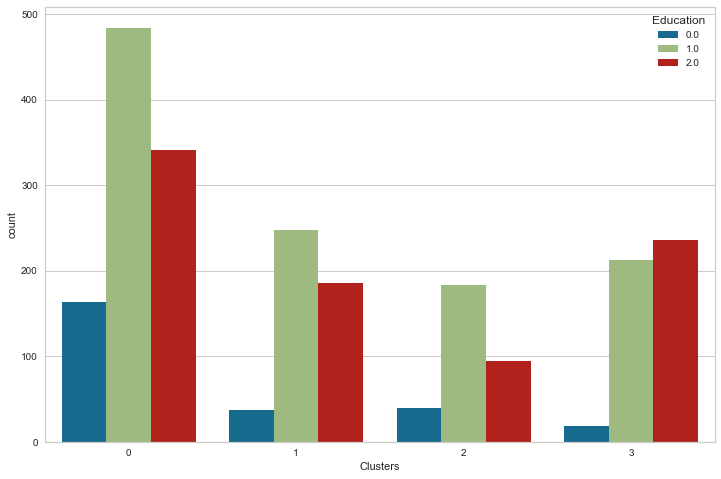

In [107]:
# Let's see how  many customers from each cluster has what kind of education level
plt.figure(figsize=(12, 8))
sns.countplot(x='Clusters', data=df2, hue='Education')
plt.show()

We have the customers with all three education level in each cluster \
Cluster 0 mostly consist of graduate and post graduate customers

In [108]:
# dividing age into groups
df2['Age_Group'] = pd.cut(x = df2['Age'], bins = [17, 24, 44, 64, 150],
                         labels = ['Young adult','Adult','Middle Aged','Senior Citizen'])

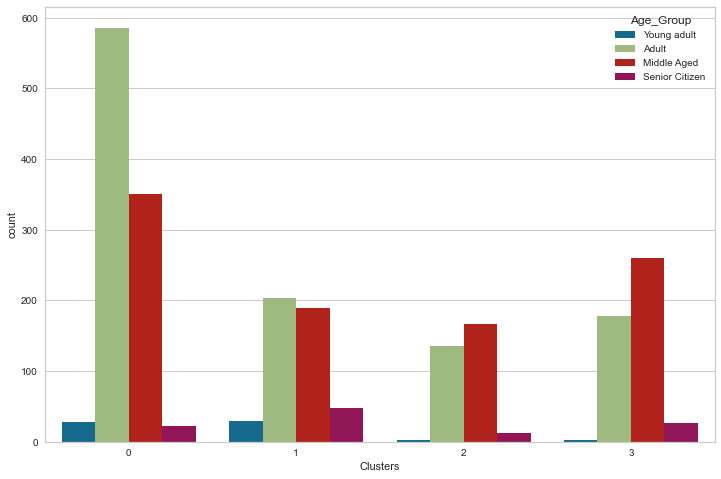

In [109]:
# Lets see what are the age groups of customers within each cluster
plt.figure(figsize=(12, 8))
sns.countplot(x='Clusters', data=df2, hue='Age_Group')
plt.show()

All clusters largly consist of customers from Middle aged and Adult age group.

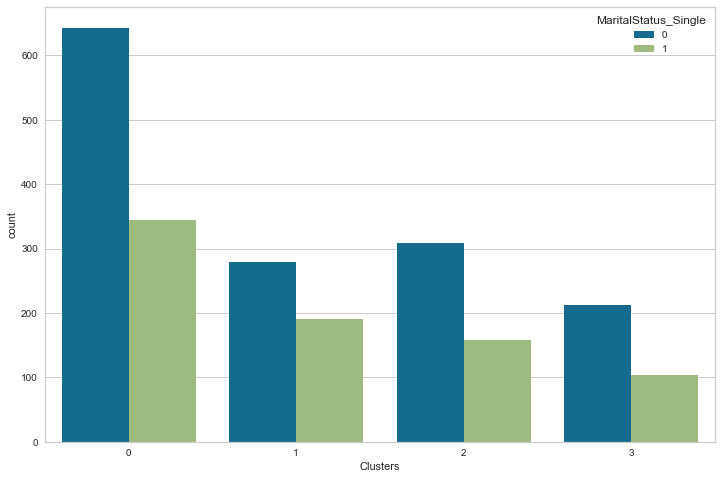

In [110]:
# Now lets findout how  many customers from each cluster has partner and see if we find something interesting
plt.figure(figsize=(12, 8))
sns.countplot(x='Clusters', data=scaled_df, hue='MaritalStatus_Single')
plt.show()

We got see similar trend among each cluster. \
All clusters consists of customers which have partner and which are single. \
They all have more number customers having partner in each cluster. \
Cluster 0 has more number of customers with partner as compared to others.

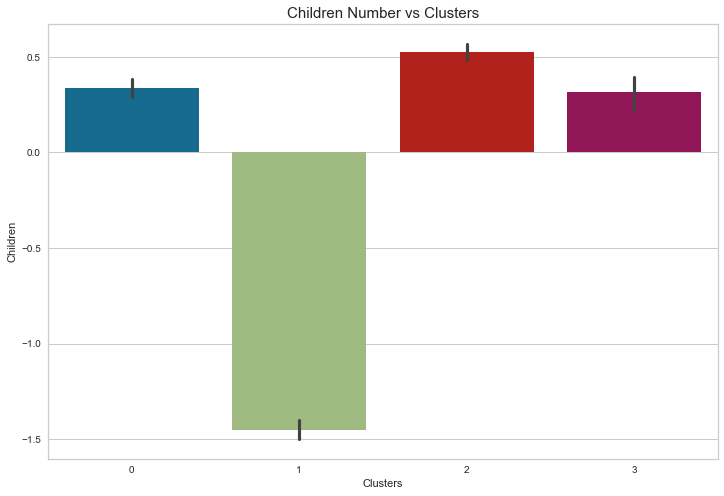

In [111]:
# Find out the customers which have children in different clusters
plt.figure(figsize=(12, 8))
sns.barplot(x=scaled_df["Clusters"], y=scaled_df["Children"])
plt.title("Children Number vs Clusters", size=15)
plt.show()

<AxesSubplot:xlabel='Clusters', ylabel='count'>

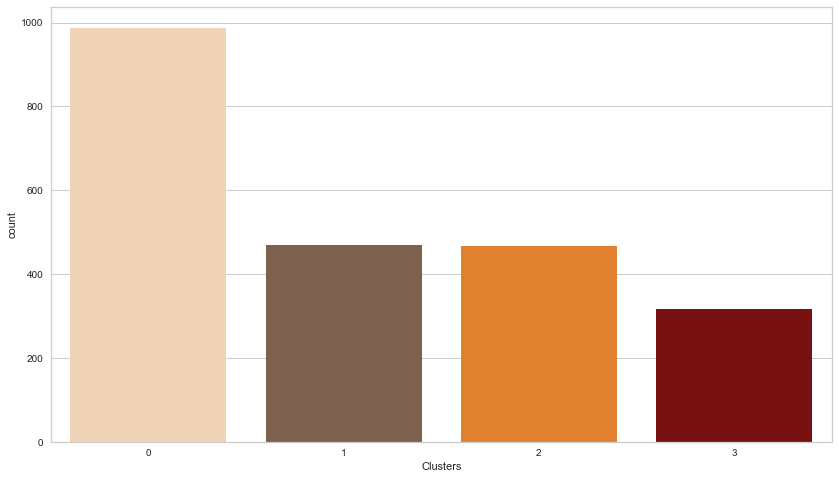

In [112]:

cl = ['#FAD3AE', '#855E46', '#FE800F', '#890000']
plt.figure(figsize=(14,8))
sns.countplot(x=scaled_df['Clusters'], palette=cl)


Most people are in group 0

<Figure size 1008x576 with 0 Axes>

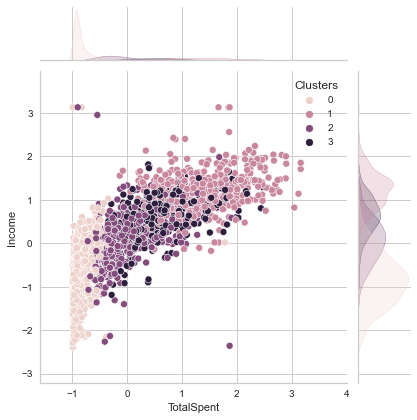

In [113]:
plt.figure(figsize=(14,8))
sns.jointplot(x=scaled_df["TotalSpent"], y=scaled_df["Income"], hue=scaled_df["Clusters"])



In [87]:
scaled_df.groupby(scaled_df["Clusters"]).mean()

Income   Recency      Wine     Fruit      Meat      Fish  \
Clusters                                                               
0        -0.816683  0.012826 -0.803851 -0.621554 -0.726630 -0.632721   
1         1.233399  0.035618  1.014384  1.021102  1.542984  1.145406   
2         0.070767 -0.053177  0.281021 -0.416388 -0.307811 -0.417738   
3         0.618261 -0.014378  0.592474  1.043202  0.436707  0.895620   

             Sweet      Gold  Discount       Web  ...     Store  WebVisits  \
Clusters                                          ...                        
0        -0.617476 -0.643551 -0.242151 -0.800383  ... -0.810498   0.424839   
1         1.038608  0.624686 -0.765276  0.259824  ...  0.702857  -1.196295   
2        -0.400360  0.234698  1.063898  0.753742  ...  0.254297   0.459047   
3         0.980784  0.738122  0.320631  1.002922  ...  1.115114  -0.231183   

          Customership  TotalSpent  Total_Acc_Cmp  Children       Age  \
Clusters                                                                
0             0.203293   -0.859554      -0.336588  0.339536 -0.219816   
1             0.058777    1.395282       0.803948 -1.452325  0.034186   
2            -0.266592   -0.033557       0.106248  0.526693  0.304211   
3            -0.328866    0.666213      -0.297851  0.315549  0.186959   

          TotalPurchases  Education  MaritalStatus_Single  
Clusters                                                   
0              -0.963703  -0.133776              0.349190  
1               0.691577   0.073834              0.405117  
2               0.592505   0.305732              0.338330  
3               1.111041  -0.143146              0.325949  

[4 rows x 21 columns]

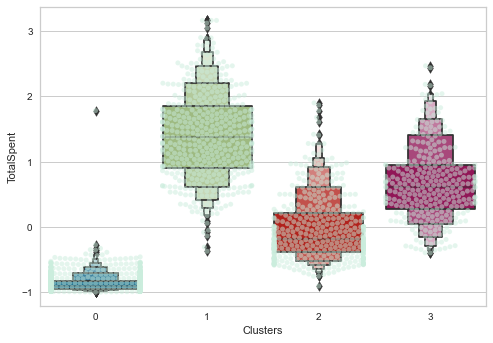

In [115]:
plt.figure()
pl=sns.swarmplot(x=scaled_df["Clusters"], y=scaled_df["TotalSpent"], color= "#CBEDDD", alpha=0.5 )
pl=sns.boxenplot(x=scaled_df["Clusters"], y=scaled_df["TotalSpent"])
plt.show()

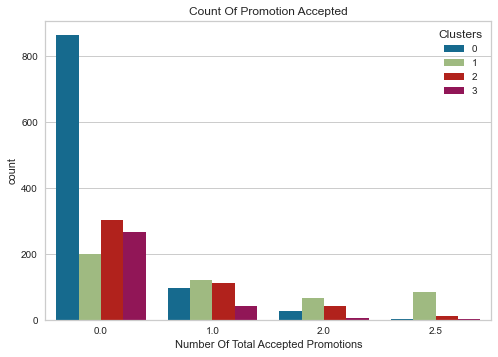

In [120]:
#Plotting count of total campaign accepted.
plt.figure()
pl = sns.countplot(x=df1["Total_Acc_Cmp"],hue=scaled_df["Clusters"])
pl.set_title("Count Of Promotion Accepted")
pl.set_xlabel("Number Of Total Accepted Promotions")
plt.show()

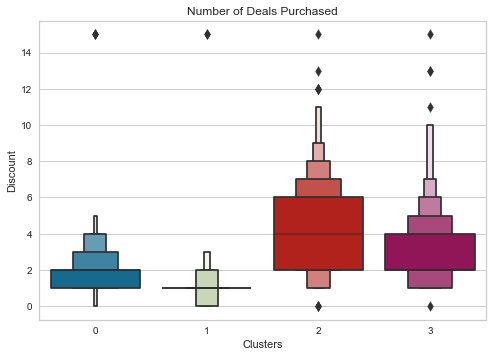

In [122]:
#Plotting the number of deals purchased
plt.figure()
pl=sns.boxenplot(y=df["Discount"],x=scaled_df["Clusters"])
pl.set_title("Number of Deals Purchased")
plt.show()